# Prática 02 - Utilização de AD

## Descrição: Utilização da técnica Naive Bayes. Observação: utilizar as mesmas bases da tarefa anterior e extrair os resultados dos experimentos.

### Autores: Mariana Emerenciano Miranda, Arthur Ferreira de Holanda, Artur Revoredo Pinto

#Introdução

Visando exercitar os conceitos aprendidos nas aulas de Modelos Supervisionados,
execute experimentos com a técnica Naive Bayes (NB), de tal forma que você possa escolher diferentes tipos de classificadores da mesma família.

# Descrição da atividade

Para o Naive Bayes, você deverá executar experimentos com três tipos diferentes, de acordo com a Figura 1.

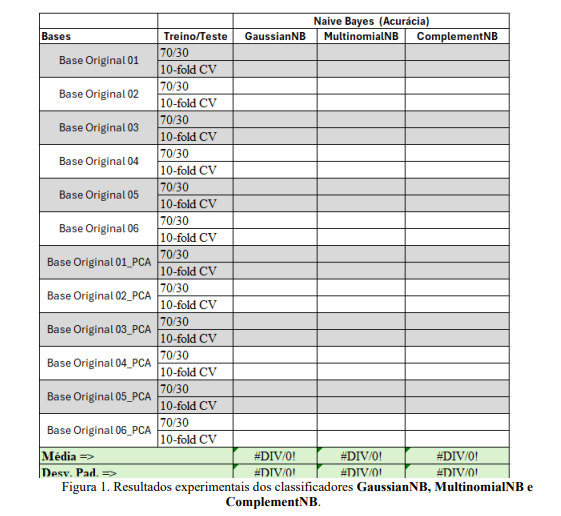

# Carregando as bases HOG e CNN

In [1]:
# Bibliotecas básicas
import numpy as np
import pandas as pd
import os
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from skimage.feature import hog
import cv2
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
import numpy as np

def evaluate_naive_bayes(X_train, X_test, y_train, y_test, X, y):
    """
    Avalia os modelos GaussianNB, MultinomialNB e ComplementNB usando Holdout 70/30 e 10-fold CV.

    Args:
        X_train (array-like): Dados de treino para Holdout.
        X_test (array-like): Dados de teste para Holdout.
        y_train (array-like): Labels de treino para Holdout.
        y_test (array-like): Labels de teste para Holdout.
        X (array-like): Dados completos para 10-fold CV.
        y (array-like): Labels completos para 10-fold CV.

    Returns:
        dict: Dicionário com as acurácias dos três modelos para Holdout e 10-fold CV.
    """
    results = {}

    # Gaussian Naive Bayes
    gnb = GaussianNB()
    # Holdout
    gnb.fit(X_train, y_train)
    y_pred_gnb = gnb.predict(X_test)
    results['GaussianNB_Holdout'] = accuracy_score(y_test, y_pred_gnb)
    # 10-fold CV
    gnb_cv_scores = cross_val_score(gnb, X, y, cv=10, scoring='accuracy')
    results['GaussianNB_CV'] = np.mean(gnb_cv_scores)

    # Multinomial Naive Bayes
    try:
        mnb = MultinomialNB()
        # Holdout
        mnb.fit(X_train, y_train)
        y_pred_mnb = mnb.predict(X_test)
        results['MultinomialNB_Holdout'] = accuracy_score(y_test, y_pred_mnb)
        # 10-fold CV
        mnb_cv_scores = cross_val_score(mnb, X, y, cv=10, scoring='accuracy')
        results['MultinomialNB_CV'] = np.mean(mnb_cv_scores)
    except ValueError as e:
        results['MultinomialNB_Holdout'] = f"Erro: {e}"
        results['MultinomialNB_CV'] = f"Erro: {e}"

    # Complement Naive Bayes
    try:
        cnb = ComplementNB()
        # Holdout
        cnb.fit(X_train, y_train)
        y_pred_cnb = cnb.predict(X_test)
        results['ComplementNB_Holdout'] = accuracy_score(y_test, y_pred_cnb)
        # 10-fold CV
        cnb_cv_scores = cross_val_score(cnb, X, y, cv=10, scoring='accuracy')
        results['ComplementNB_CV'] = np.mean(cnb_cv_scores)
    except ValueError as e:
        results['ComplementNB_Holdout'] = f"Erro: {e}"
        results['ComplementNB_CV'] = f"Erro: {e}"

    return results


In [3]:
from sklearn.preprocessing import KBinsDiscretizer

def transformar_para_discreto(dataset, n_bins=5):
    X = dataset.iloc[:, :-1]
    y = dataset.iloc[:, -1]

    discretizer = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy='uniform')

    X_discreto = discretizer.fit_transform(X)

    dataset_discreto = pd.DataFrame(X_discreto, columns=X.columns)
    dataset_discreto['label'] = y.reset_index(drop=True)

    return dataset_discreto

In [4]:
def divisao_holdout(base_original):
  tipos_numericos = ['int32', 'int64', 'float16', 'float32', 'float64']
  cols_num = base_original.select_dtypes(include=tipos_numericos)
  colunas_numericas = list(cols_num.columns)

  features_base_original = base_original[colunas_numericas]
  labels_base_original = base_original['label']

  X_train, X_test, y_train, y_test = train_test_split(features_base_original, labels_base_original, test_size=0.3, random_state=42)
  return X_train, X_test, y_train, y_test


In [5]:
def divisao_X_e_y(base_original):
  tipos_numericos = ['int32', 'int64', 'float16', 'float32', 'float64']
  cols_num = base_original.select_dtypes(include=tipos_numericos)
  colunas_numericas = list(cols_num.columns)

  features= base_original[colunas_numericas]
  labels = base_original['label']

  return features, labels

In [6]:
hog_128_16_pca = pd.read_csv('/content/CSVs PCA/hog_128_16_PCA-10.csv')

In [7]:
hog_128_20 = pd.read_csv('/content/CSVs/hog_features_128_20.csv')

In [8]:
hog_256_16_pca = pd.read_csv('/content/CSVs PCA/hog_256_16_PCA-10.csv')

In [9]:
hog_256_20_pca = pd.read_csv('/content/CSVs PCA/hog_256_20_PCA-10.csv')

In [10]:
cnn_vgg16_128_avg = pd.read_csv('/content/CSVs/cnn_VGG16_avg_128.csv')

In [11]:
cnn_vgg16_128_max_pca = pd.read_csv('/content/CSVs PCA/cnn_VGG16_max_128_PCA-10.csv')

In [12]:
cnn_vgg16_256_avg = pd.read_csv('/content/CSVs/cnn_VGG16_avg_256.csv')

In [13]:
cnn_vgg16_256_max = pd.read_csv('/content/CSVs/cnn_VGG16_max_256.csv')

In [14]:
cnn_vgg19_128_avg = pd.read_csv('/content/CSVs/cnn_VGG19_avg_128.csv')

In [15]:
cnn_vgg19_128_max_pca = pd.read_csv('/content/CSVs PCA/cnn_VGG19_max_128_PCA-10.csv')

In [16]:
cnn_vgg19_256_avg = pd.read_csv('/content/CSVs/cnn_VGG19_avg_256.csv')

In [17]:
cnn_vgg19_256_max_pca = pd.read_csv('/content/CSVs PCA/cnn_VGG19_256_max_PCA-10.csv')

In [18]:
hog_128_16_pca = transformar_para_discreto(hog_128_16_pca)
hog_128_20 = transformar_para_discreto(hog_128_20)
hog_256_16_pca = transformar_para_discreto(hog_256_16_pca)
hog_256_20_pca = transformar_para_discreto(hog_256_20_pca)

In [19]:
cnn_vgg16_128_avg = cnn_vgg16_128_avg.drop(columns='filename')
cnn_vgg16_256_avg = cnn_vgg16_256_avg.drop(columns='filename')
cnn_vgg16_256_max = cnn_vgg16_256_max.drop(columns='filename')

cnn_vgg19_128_avg = cnn_vgg19_128_avg.drop(columns='filename')
cnn_vgg19_256_avg = cnn_vgg19_256_avg.drop(columns='filename')

In [20]:
cnn_vgg16_128_avg = transformar_para_discreto(cnn_vgg16_128_avg)
cnn_vgg16_128_max_pca = transformar_para_discreto(cnn_vgg16_128_max_pca)
cnn_vgg16_256_avg = transformar_para_discreto(cnn_vgg16_256_avg)
cnn_vgg16_256_max = transformar_para_discreto(cnn_vgg16_256_max)

cnn_vgg19_128_avg = transformar_para_discreto(cnn_vgg19_128_avg)
cnn_vgg19_128_max_pca = transformar_para_discreto(cnn_vgg19_128_max_pca)
cnn_vgg19_256_avg = transformar_para_discreto(cnn_vgg19_256_avg)
cnn_vgg19_256_max_pca = transformar_para_discreto(cnn_vgg19_256_max_pca)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:262: UserWarning: Feature 0 is constant and will be replaced with 0.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:262: UserWarning: Feature 1 is constant and will be replaced with 0.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:262: UserWarning: Feature 2 is constant and will be replaced with 0.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:262: UserWarning: Feature 3 is constant and will be replaced with 0.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:262: UserWarning: Feature 4 is constant and will be replaced with 0.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:262: UserWarning: Feature 5 is constant and will be replaced with 0.
  warnings.warn

In [21]:
# Features e labels
features_hog_128_16_pca, labels_hog_128_16_pca = divisao_X_e_y(hog_128_16_pca)

features_hog_128_20, labels_hog_128_20 = divisao_X_e_y(hog_128_20)

features_hog_256_20_pca, labels_hog_256_20_pca = divisao_X_e_y(hog_256_20_pca)

features_hog_256_16_pca, labels_hog_256_16_pca = divisao_X_e_y(hog_256_16_pca)

In [22]:
X_train_hog_128_20, X_test_hog_128_20, y_train_hog_128_20, y_test_hog_128_20 = divisao_holdout(hog_128_20)

X_train_hog_128_16_pca, X_test_hog_128_16_pca, y_train_hog_128_16_pca, y_test_hog_128_16_pca = divisao_holdout(hog_128_16_pca)

X_train_hog_256_16_pca, X_test_hog_256_16_pca, y_train_hog_256_16_pca, y_test_hog_256_16_pca = divisao_holdout(hog_256_16_pca)

X_train_hog_256_20_pca, X_test_hog_256_20_pca, y_train_hog_256_20_pca, y_test_hog_256_20_pca = divisao_holdout(hog_256_20_pca)

In [23]:
features_cnn_vgg16_128_max_pca, labels_cnn_vgg16_128_max_pca = divisao_X_e_y(cnn_vgg16_128_max_pca)

features_cnn_vgg19_128_max_pca, labels_cnn_vgg19_128_max_pca = divisao_X_e_y(cnn_vgg19_128_max_pca)

features_cnn_vgg19_256_max_pca, labels_cnn_vgg19_256_max_pca = divisao_X_e_y(cnn_vgg19_256_max_pca)

features_cnn_vgg16_128_avg, labels_cnn_vgg16_128_avg = divisao_X_e_y(cnn_vgg16_128_avg)
features_cnn_vgg16_256_avg, labels_cnn_vgg16_256_avg = divisao_X_e_y(cnn_vgg16_256_avg)
features_cnn_vgg16_256_max, labels_cnn_vgg16_256_max = divisao_X_e_y(cnn_vgg16_256_max)

features_cnn_vgg19_128_avg, labels_cnn_vgg19_128_avg = divisao_X_e_y(cnn_vgg19_128_avg)
features_cnn_vgg19_256_avg, labels_cnn_vgg19_256_avg = divisao_X_e_y(cnn_vgg19_256_avg)

In [24]:
X_train_vgg16_128_max_pca, X_test_vgg16_128_max_pca, y_train_vgg16_128_max_pca, y_test_vgg16_128_max_pca = divisao_holdout(cnn_vgg16_128_max_pca)

X_train_vgg19_128_max_pca, X_test_vgg19_128_max_pca, y_train_vgg19_128_max_pca, y_test_vgg19_128_max_pca = divisao_holdout(cnn_vgg19_128_max_pca)

X_train_vgg19_256_max_pca, X_test_vgg19_256_max_pca, y_train_vgg19_256_max_pca, y_test_vgg19_256_max_pca = divisao_holdout(cnn_vgg19_256_max_pca)

X_train_vgg16_128_avg, X_test_vgg16_128_avg, y_train_vgg16_128_avg, y_test_vgg16_128_avg = divisao_holdout(cnn_vgg16_128_avg)
X_train_vgg16_256_avg, X_test_vgg16_256_avg, y_train_vgg16_256_avg, y_test_vgg16_256_avg = divisao_holdout(cnn_vgg16_256_avg)
X_train_vgg16_256_max, X_test_vgg16_256_max, y_train_vgg16_256_max, y_test_vgg16_256_max = divisao_holdout(cnn_vgg16_256_max)

X_train_vgg19_128_avg, X_test_vgg19_128_avg, y_train_vgg19_128_avg, y_test_vgg19_128_avg = divisao_holdout(cnn_vgg19_128_avg)
X_train_vgg19_256_avg, X_test_vgg19_256_avg, y_train_vgg19_256_avg, y_test_vgg19_256_avg = divisao_holdout(cnn_vgg19_256_avg)


## Acurácias HOGs

In [25]:
#HOG 128 16 PCA
results_hog_128_16_pca_nb = evaluate_naive_bayes(X_train_hog_128_16_pca, X_test_hog_128_16_pca, y_train_hog_128_16_pca, y_test_hog_128_16_pca, features_hog_128_16_pca, labels_hog_128_16_pca)

for model, accuracy in results_hog_128_16_pca_nb.items():
    print(f"{model}: {accuracy}")

GaussianNB_Holdout: 0.5355648535564853
GaussianNB_CV: 0.46965189873417723
MultinomialNB_Holdout: 0.4686192468619247
MultinomialNB_CV: 0.4610284810126582
ComplementNB_Holdout: 0.4602510460251046
ComplementNB_CV: 0.4648259493670886


In [27]:
#HOG 128 20
results_hog_128_20_nb = evaluate_naive_bayes(X_train_hog_128_20, X_test_hog_128_20, y_train_hog_128_20, y_test_hog_128_20, features_hog_128_20, labels_hog_128_20)

for model, accuracy in results_hog_128_20_nb.items():
    print(f"{model}: {accuracy}")

GaussianNB_Holdout: 0.6276150627615062
GaussianNB_CV: 0.6032911392405064
MultinomialNB_Holdout: 0.5523012552301255
MultinomialNB_CV: 0.5440506329113923
ComplementNB_Holdout: 0.5564853556485355
ComplementNB_CV: 0.5515981012658228


In [28]:
#HOG 256 16 PCA
results_hog_256_16_pca_nb = evaluate_naive_bayes(X_train_hog_256_16_pca, X_test_hog_256_16_pca, y_train_hog_256_16_pca, y_test_hog_256_16_pca, features_hog_256_16_pca, labels_hog_256_16_pca)

for model, accuracy in results_hog_256_16_pca_nb.items():
    print(f"{model}: {accuracy}")

GaussianNB_Holdout: 0.4560669456066946
GaussianNB_CV: 0.41311708860759494
MultinomialNB_Holdout: 0.39330543933054396
MultinomialNB_CV: 0.43966772151898736
ComplementNB_Holdout: 0.4225941422594142
ComplementNB_CV: 0.44723101265822784


In [29]:
#HOG 256 20 PCA
results_hog_256_20_pca_nb = evaluate_naive_bayes(X_train_hog_256_20_pca, X_test_hog_256_20_pca, y_train_hog_256_20_pca, y_test_hog_256_20_pca, features_hog_256_16_pca, labels_hog_256_16_pca)

for model, accuracy in results_hog_256_20_pca_nb.items():
    print(f"{model}: {accuracy}")

GaussianNB_Holdout: 0.502092050209205
GaussianNB_CV: 0.41311708860759494
MultinomialNB_Holdout: 0.4309623430962343
MultinomialNB_CV: 0.43966772151898736
ComplementNB_Holdout: 0.45188284518828453
ComplementNB_CV: 0.44723101265822784


## Acurácias CNNs

In [30]:
#CNN VGG16 128 AVG
results_cnn_VGG16_128_avg_nb = evaluate_naive_bayes(X_train_vgg16_128_avg, X_test_vgg16_128_avg, y_train_vgg16_128_avg, y_test_vgg16_128_avg, features_cnn_vgg16_128_avg, labels_cnn_vgg16_128_avg)

for model, accuracy in results_cnn_VGG16_128_avg_nb.items():
    print(f"{model}: {accuracy}")

GaussianNB_Holdout: 0.2647058823529412
GaussianNB_CV: 0.34976265822784813
MultinomialNB_Holdout: 0.37815126050420167
MultinomialNB_CV: 0.41289556962025314
ComplementNB_Holdout: 0.35714285714285715
ComplementNB_CV: 0.3850474683544304


In [31]:
#CNN VGG16 128 MAX PCA
results_cnn_VGG16_128_max_pca_nb = evaluate_naive_bayes(X_train_vgg16_128_max_pca, X_test_vgg16_128_max_pca, y_train_vgg16_128_max_pca, y_test_vgg16_128_max_pca, features_cnn_vgg16_128_max_pca, labels_cnn_vgg16_128_max_pca)

for model, accuracy in results_cnn_VGG16_128_max_pca_nb.items():
    print(f"{model}: {accuracy}")

GaussianNB_Holdout: 0.3067226890756303
GaussianNB_CV: 0.3587025316455696
MultinomialNB_Holdout: 0.31092436974789917
MultinomialNB_CV: 0.3762974683544304
ComplementNB_Holdout: 0.33613445378151263
ComplementNB_CV: 0.3889715189873417


In [32]:
#CNN VGG16 256 AVG
results_cnn_VGG16_256_avg_nb = evaluate_naive_bayes(X_train_vgg16_256_avg, X_test_vgg16_256_avg, y_train_vgg16_256_avg, y_test_vgg16_256_avg, features_cnn_vgg16_256_avg, labels_cnn_vgg16_256_avg)

for model, accuracy in results_cnn_VGG16_256_avg_nb.items():
    print(f"{model}: {accuracy}")

GaussianNB_Holdout: 0.29411764705882354
GaussianNB_CV: 0.31186708860759493
MultinomialNB_Holdout: 0.40756302521008403
MultinomialNB_CV: 0.47346518987341774
ComplementNB_Holdout: 0.36554621848739494
ComplementNB_CV: 0.43433544303797467


In [33]:
#CNN VGG16 256 MAX
results_cnn_VGG16_256_max_nb = evaluate_naive_bayes(X_train_vgg16_256_max, X_test_vgg16_256_max, y_train_vgg16_256_max, y_test_vgg16_256_max, features_cnn_vgg16_256_max, labels_cnn_vgg16_256_max)

for model, accuracy in results_cnn_VGG16_256_max_nb.items():
    print(f"{model}: {accuracy}")

GaussianNB_Holdout: 0.28991596638655465
GaussianNB_CV: 0.3054746835443038
MultinomialNB_Holdout: 0.28991596638655465
MultinomialNB_CV: 0.34971518987341776
ComplementNB_Holdout: 0.29831932773109243
ComplementNB_CV: 0.35729430379746835


In [34]:
#CNN VGG19 128 AVG
results_cnn_VGG19_128_avg_nb = evaluate_naive_bayes(X_train_vgg19_128_avg, X_test_vgg19_128_avg, y_train_vgg19_128_avg, y_test_vgg19_128_avg, features_cnn_vgg19_128_avg, labels_cnn_vgg19_128_avg)

for model, accuracy in results_cnn_VGG19_128_avg_nb.items():
    print(f"{model}: {accuracy}")

GaussianNB_Holdout: 0.33613445378151263
GaussianNB_CV: 0.30047468354430384
MultinomialNB_Holdout: 0.3319327731092437
MultinomialNB_CV: 0.4178639240506329
ComplementNB_Holdout: 0.3319327731092437
ComplementNB_CV: 0.3964240506329114


In [35]:
#CNN VGG19 128 MAX PCA
results_cnn_VGG19_128_max_pca_nb = evaluate_naive_bayes(X_train_vgg19_128_max_pca, X_test_vgg19_128_max_pca, y_train_vgg19_128_max_pca, y_test_vgg19_128_max_pca, features_cnn_vgg19_128_max_pca, labels_cnn_vgg19_128_max_pca)

for model, accuracy in results_cnn_VGG19_128_max_pca_nb.items():
    print(f"{model}: {accuracy}")

GaussianNB_Holdout: 0.31092436974789917
GaussianNB_CV: 0.39765822784810123
MultinomialNB_Holdout: 0.3277310924369748
MultinomialNB_CV: 0.3800316455696202
ComplementNB_Holdout: 0.3487394957983193
ComplementNB_CV: 0.3698892405063291


In [36]:
#CNN VGG19 256 AVG
results_cnn_VGG19_256_avg_nb = evaluate_naive_bayes(X_train_vgg19_256_avg, X_test_vgg19_256_avg, y_train_vgg19_256_avg, y_test_vgg19_256_avg, features_cnn_vgg19_256_avg, labels_cnn_vgg19_256_avg)

for model, accuracy in results_cnn_VGG19_256_avg_nb.items():
    print(f"{model}: {accuracy}")

GaussianNB_Holdout: 0.2815126050420168
GaussianNB_CV: 0.27911392405063296
MultinomialNB_Holdout: 0.37815126050420167
MultinomialNB_CV: 0.40525316455696203
ComplementNB_Holdout: 0.37815126050420167
ComplementNB_CV: 0.3964715189873418


In [37]:
#CNN VGG16 256 MAX PCA

results_cnn_VGG19_256_max_pca_nb = evaluate_naive_bayes(X_train_vgg19_256_max_pca, X_test_vgg19_256_max_pca, y_train_vgg19_256_max_pca, y_test_vgg19_256_max_pca, features_cnn_vgg19_256_max_pca, labels_cnn_vgg19_256_max_pca)

for model, accuracy in results_cnn_VGG19_256_max_pca_nb.items():
    print(f"{model}: {accuracy}")

GaussianNB_Holdout: 0.2689075630252101
GaussianNB_CV: 0.3269462025316455
MultinomialNB_Holdout: 0.3025210084033613
MultinomialNB_CV: 0.3383386075949367
ComplementNB_Holdout: 0.2773109243697479
ComplementNB_CV: 0.32193037974683547


# Apresentação dos Resultados

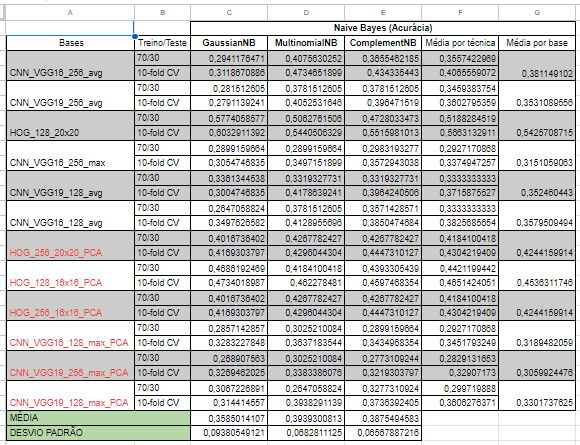